# Lecture 02a - Regression Basics

In [1]:
import numpy as np
import pandas as pd
import statsmodels
# we will use `smf` and `sm` to constract and estimate same regressions but using different ways
import statsmodels.formula.api as smf  
import statsmodels.api as sm
import statsmodels.stats.api as sms
import seaborn as sns
from matplotlib import pyplot as plt

While linear regression is a pretty simple task, there are several assumptions for the model that we may want to validate. I follow the regression diagnostic __[here](http://people.duke.edu/~rnau/testing.htm)__, trying to justify four principal assumptions, namely "L.I.N.E." in Python:

- **L**inearity
- **I**ndependence
- **N**ormality
- **E**qual variance (or homoscedasticity)

In fact, `statsmodels` contains useful modules for __[regression diagnostics](http://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html)__. In addition to those, I want to go with somewhat manual yet very simple ways for more flexible visualizations.

## Basic examples using simulated data

In [2]:
# Simulate data
n=1000           # number of observations
mu=0
sd=1
beta0=1          # define desired intercept
beta1=1.5        # define desired slope

# Simulate x data:
x=np.random.normal(loc=mu,scale=sd,size=(n,1))

# Simulate errors. Errors must be with zero mean, but you can make standard deviation more or less than standard deviation of x (try!)
err=np.random.normal(loc=0,scale=sd*4,size=(n,1))

# Calculate y data:
y = beta0 + beta1*x + err    # observed data (with error)
y_true = beta0 + beta1*x     # true data

There are several ways you can create a dataframe (pick one):

In [3]:
df=pd.DataFrame(data=np.hstack((x,y)), columns=['x','y'])                   # Option 1
# df = pd.DataFrame(np.concatenate([x,y], axis=1), columns= ['x','y'])      # Option 2
df

,x,y
0,0.592300,8.788860
1,0.204966,1.345074
2,-1.252315,-11.077204
3,0.254526,0.470378
4,-0.730916,-5.412924
...,...,...
995,-0.276719,0.601610
996,0.047372,-2.814411
997,1.254678,4.998922
998,-0.893297,1.100625


The code below allows to create automatic column headings for each of your variables following a specific naming pattern:

In [4]:
df_alt = pd.DataFrame(np.concatenate([x,y], axis=1), columns= ['Var_{}'.format(i+1) for i in range(2)])
df_alt

,Var_1,Var_2
0,0.592300,8.788860
1,0.204966,1.345074
2,-1.252315,-11.077204
3,0.254526,0.470378
4,-0.730916,-5.412924
...,...,...
995,-0.276719,0.601610
996,0.047372,-2.814411
997,1.254678,4.998922
998,-0.893297,1.100625


### Regression using `statsmodels.api` (imported as `sm`)

For more information, check Linear Regression from `statsmodels` __[documentation](https://www.statsmodels.org/dev/regression.html)__.

In [5]:
x_const=sm.add_constant(x,prepend=True)
x_const

array([[ 1.        ,  0.5922996 ],
       [ 1.        ,  0.2049665 ],
       [ 1.        , -1.25231496],
       ...,
       [ 1.        ,  1.25467811],
       [ 1.        , -0.89329682],
       [ 1.        ,  0.89992756]])

In [6]:
reg=sm.OLS(y,x_const).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     129.0
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           3.40e-28
Time:                        20:35:37   Log-Likelihood:                -2812.9
No. Observations:                1000   AIC:                             5630.
Df Residuals:                     998   BIC:                             5640.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9452      0.128      7.402      0.000       0.695       1.196
x1             1.4656      0.129     11.357      0.000       1.212       1.719
==============================================================================
Omnibus:                       10.730   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                7.906
Skew:                           0.103   Prob(JB):                       0.0192
Kurtosis:                       2.616   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression using `statsmodels.formula.api` (imported as `smf`)

If you want to exclude a constant, use:
- `y ~ -1 + x` formula (the order of variables in the formula does not matter)

#### Operators
If `df` contains column names Lottery, Literacy, Wealth, and Region, you can apply formula like this:  
`reg = smf.ols(formula='Lottery ~ Literacy + Wealth + C(Region) -1 ', data=df).fit()`  

More on the format of the `formula` parameter: 

- `~` separates the left-hand side of the model from the right-hand side
- `+` adds new columns to the design matrix
- `-` sign can be used to remove columns/variables (by default, every model will include a constant, -1 forces removal of the constant)
- `C(name)` use this "wrapper" if you want to treat variable `name` explicitly as categorical
- `:` adds a new column to the design matrix with the product of the two columns
    - `reg1 = smf.ols(formula='Lottery ~ Literacy : Wealth - 1', data=df).fit()`
- `*` will also include the individual columns that were multiplied together
    - `reg2 = smf.ols(formula='Lottery ~ Literacy * Wealth - 1', data=df).fit()`

You can apply vectorized functions to the variables in your model:
- `reg = smf.ols(formula='Lottery ~ np.log(Literacy)', data=df).fit()`  

or define a custom function and apply it

`def log_plus_1(x):`  
   ...... `return np.log(x) + 1.0`

`reg = smf.ols(formula='Lottery ~ log_plus_1(Literacy)', data=df).fit()`


Although it does not recognize the notation `x**2` (quadratic term), it does recognize `numpy` functions. Thus, you can use `np.power(x, 2)`.

More information is __[here](https://www.statsmodels.org/stable/example_formulas.html)__.

In [7]:
reg = smf.ols('y ~ x', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     129.0
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           3.40e-28
Time:                        20:36:01   Log-Likelihood:                -2812.9
No. Observations:                1000   AIC:                             5630.
Df Residuals:                     998   BIC:                             5640.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9452      0.128      7.402      0.000       0.695       1.196
x              1.4656      0.129     11.357      0.000       1.212       1.719
==============================================================================
Omnibus:                       10.730   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                7.906
Skew:                           0.103   Prob(JB):                       0.0192
Kurtosis:                       2.616   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As an example, consider including a quadratic term into your regression:

In [8]:
reg_quadratic = smf.ols('y ~ x + np.power(x,2)', data=df).fit()
reg_quadratic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     64.44
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           4.80e-27
Time:                        20:36:18   Log-Likelihood:                -2812.8
No. Observations:                1000   AIC:                             5632.
Df Residuals:                     997   BIC:                             5646.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9617      0.157      6.142      0.000       0.654       1.269
x                  1.4659      0.129     11.352      0.000       1.212       1.719
np.power(x, 2)    -0.0168      0.093     -0.182      0.856      -0.198       0.165
==============================================================================
Omnibus:                       10.619   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                7.860
Skew:                           0.104   Prob(JB):                       0.0196
Kurtosis:                       2.619   Cond. No.                         2.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Accessing additional output values from regression

There are a number of saved results contained in the regression container (e.g., in our case, the variable `reg`) which you can access:

In [9]:
print('Parameters:\n', reg.params)
print('R2: ', reg.rsquared)
print('Adj R2: ', reg.rsquared_adj)

Parameters:
 Intercept    0.945192
x            1.465624
dtype: float64
R2:  0.11444063335920851
Adj R2:  0.1135532993244982


To see all available method and values, use:

In [ ]:
dir(reg)

Some of the most often used:

In [11]:
reg.condition_number # generally, for collinearity assessment
reg.cov_type         # is your Cov matrix robust on non-robust?
reg.df_resid         # degrees of freedom
reg.outlier_test()   # checks of outlier points (nrmally, would have to plot it to see)
reg.tvalues          # values of t-stats for your estimates
reg.bse              # standard errors of your estimates
reg.predict()        # predicted (fitted y's) values
reg.fittedvalues     # same as above (different data container)
# etc...

0      1.604074
1      2.277302
2      0.147170
3      1.243742
4     -2.073128
         ...   
995    2.446375
996    1.890750
997   -0.448628
998    1.337759
999    0.369020
Length: 1000, dtype: float64

#### Why do we need to access these additional values? 
Allows to be more creative in constracting something of your own (a test, a plot, a function with multiple tests and plots):

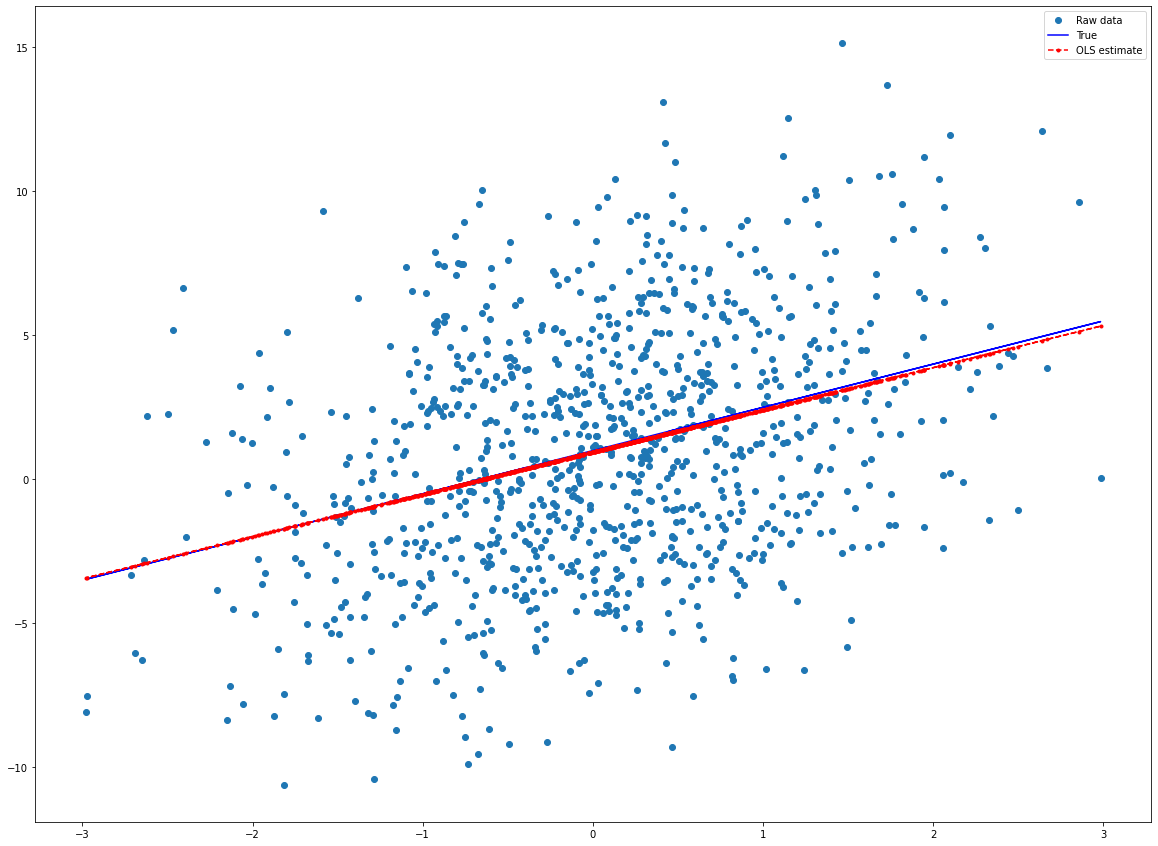

In [12]:
fig, ax = plt.subplots(figsize=(20,15))
ax.plot(x, y, 'o', label="Raw data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, reg.fittedvalues, 'r--.', label="OLS estimate")
ax.legend(loc='best');

More advanced example (adding confidence intervals to your regression estimate):

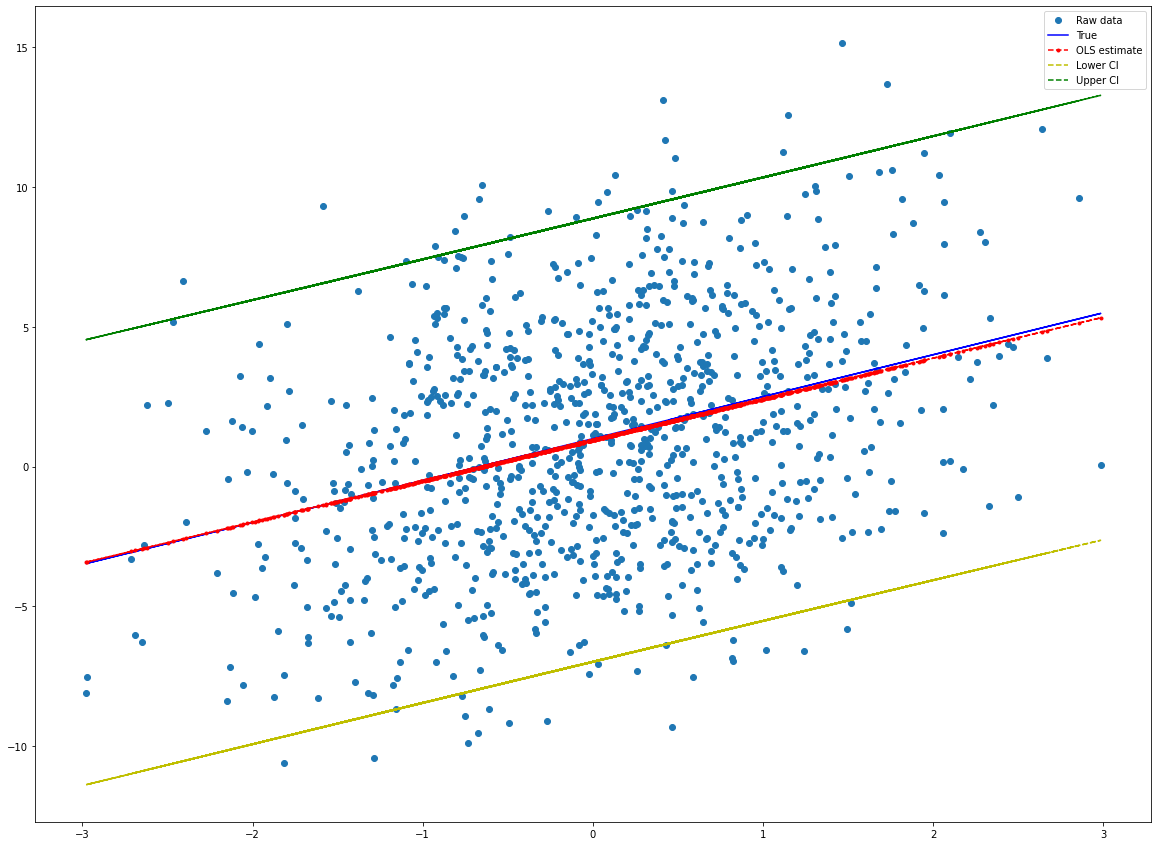

In [13]:
# Calculate standard deviation and confidence interval for prediction.
# Applies to WLS and OLS, not to general GLS, that is independently but not identically distributed observations

# Parameters:
# reg   : regression result instance
# alpha : significance (default: alpha = 0.05)

# Returns:
# prstd : array_like, 1d - standard error of prediction same length as data
# CI_L, CI_U : lower und upper confidence bounds

from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, CI_L, CI_U = wls_prediction_std(reg,alpha=0.05)


fig, ax = plt.subplots(figsize=(20,15))
ax.plot(x, y, 'o', label="Raw data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, reg.fittedvalues, 'r--.', label="OLS estimate")
ax.plot(x, CI_L, 'y--', label="Lower CI")
ax.plot(x, CI_U, 'g--', label="Upper CI")
ax.legend(loc='best');

## Regression diagnostics

### Estimate regression

Dataset on moral statistics of France and variable definitions can be found [here](https://www.datavis.ca/gallery/guerry/guerrydat.html). 

Moral statistics most narrowly refers to numerical data generally considered to be indicative of social pathology in groups of people. Examples include statistics on crimes (against persons and property), illiteracy, suicide, illegitimacy, abortion, divorce, prostitution, etc. 


In [11]:
# Load data
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Guerry.csv'
df = pd.read_csv(url)

# Fit regression model (using the natural log of one of the regressors)
reg = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=df).fit()

# Inspect the results
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           1.90e-08
Time:                        11:14:23   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233      6.995      0.000     176.358     316.510
Literacy           -0.4889      0.128     -3.832      0.000      -0.743      -0.235
np.log(Pop1831)   -31.3114      5.977     -5.239      0.000     -43.199     -19.424
==============================================================================
Omnibus:                        3.713   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.394
Skew:                          -0.487   Prob(JB):                        0.183
Kurtosis:                       3.003   Cond. No.                         702.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Normality of the residuals

Last time we have looked at several statistical test for normality of variables. Even better, we can check the normality of any data, and, **more importantly**, the residuals of the regression. 

In [12]:
# https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.jarque_bera.html
test = sms.jarque_bera(reg.resid)
test

(3.3936080248431706,
 0.18326831231663335,
 -0.486580343112234,
 3.0034177578816332)

In [13]:
JBpvalue=test[1]
JBpvalue

0.18326831231663335

Create your own "helper" function for later use and apply it to your regression:

In [14]:
def JBtest2(resid,a):
    # You may want to import requied libraries here as well, 
    # e.g., sms is defined at the begining of this Notebook, but could be included here in the function
    # in case you want to use it outside of this Notebook.
    test = sms.jarque_bera(resid)
    JBpvalue=test[1]
    print(f'Jarque-Bera test:')
    if JBpvalue<=a:
        print(f'\tp-value is {JBpvalue:.03f}\n\tReject the null hypothesis that residuals are normally distributed. \n\tResiduals are NOT normally distributed.')
    else:
        print(f'\tp-value is {JBpvalue:.03f}\n\tFail to reject the null hypothesis that residuals are normally distributed. \n\tResiduals ARE normally distributed. ')
    return JBpvalue    

In [15]:
jbpval=JBtest2(reg.resid,0.05)

Jarque-Bera test:
	p-value is 0.183
	Fail to reject the null hypothesis that residuals are normally distributed. 
	Residuals ARE normally distributed. 


> <font color=red> In-Class Exercise: </font> The function above in tailor-made to work with the regression object srom `statsmodels` package. Not all regression object will have a method `.resid` to provide you with the fitted residuals. Think of a way to generalise the function above.

### Outlier detection

#### Influential observations

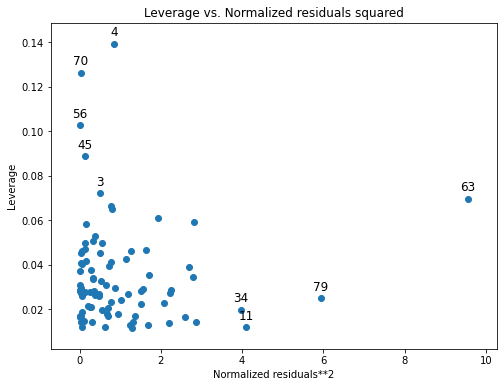

In [21]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(reg, ax = ax)

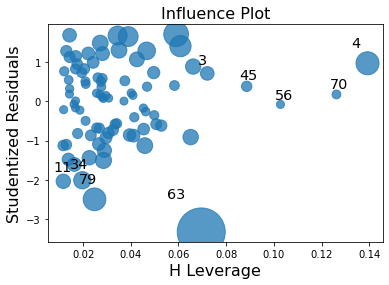

In [22]:
sm.graphics.influence_plot(reg)
plt.show()

### Simulation with a single outlier
Consider simulated example from earlier. We will impute a single outlier into the data. You may need to re-run the data generation process (DGP) several times to get the "best" outcome (aka large enough outlier):

In [39]:
# Simulate data
n=100           # number of observations          # MAKE CHANGES HERE
mu=0
sd=1
beta0=1          # define desired intercept
beta1=1.5        # define desired slope

# Simulate x data:
x=np.random.normal(loc=mu,scale=sd,size=(n,1))
x_const=sm.add_constant(x,prepend=True)

# Simulate errors. Errors must be with zero mean, but you can make standard deviation more or less than standard deviation of x (try!)
err=np.random.normal(loc=0,scale=sd*1,size=(n,1)) # MAKE CHANGES HERE

# Calculate y data:
y = beta0 + beta1*x + err    # observed data (with error)
y_true = beta0 + beta1*x     # true data

reg=sm.OLS(y,x_const).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     140.6
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           1.21e-20
Time:                        21:05:31   Log-Likelihood:                -152.71
No. Observations:                 100   AIC:                             309.4
Df Residuals:                      98   BIC:                             314.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9986      0.113      8.858      0.000       0.775       1.222
x1             1.3857      0.117     11.856      0.000       1.154       1.618
==============================================================================
Omnibus:                        0.699   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.655
Skew:                           0.192   Prob(JB):                        0.721
Kurtosis:                       2.904   Cond. No.                         1.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
err_outlier=err
err_outlier[-1]=err_outlier[-1]*10
y_outlier = beta0 + beta1*x + err_outlier
reg_outlier=sm.OLS(y_outlier,x_const).fit()
reg_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     79.55
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           2.68e-14
Time:                        21:05:34   Log-Likelihood:                -173.53
No. Observations:                 100   AIC:                             351.1
Df Residuals:                      98   BIC:                             356.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0785      0.139      7.769      0.000       0.803       1.354
x1             1.2837      0.144      8.919      0.000       0.998       1.569
==============================================================================
Omnibus:                       63.614   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.124
Skew:                           1.918   Prob(JB):                     2.41e-94
Kurtosis:                      12.421   Cond. No.                         1.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

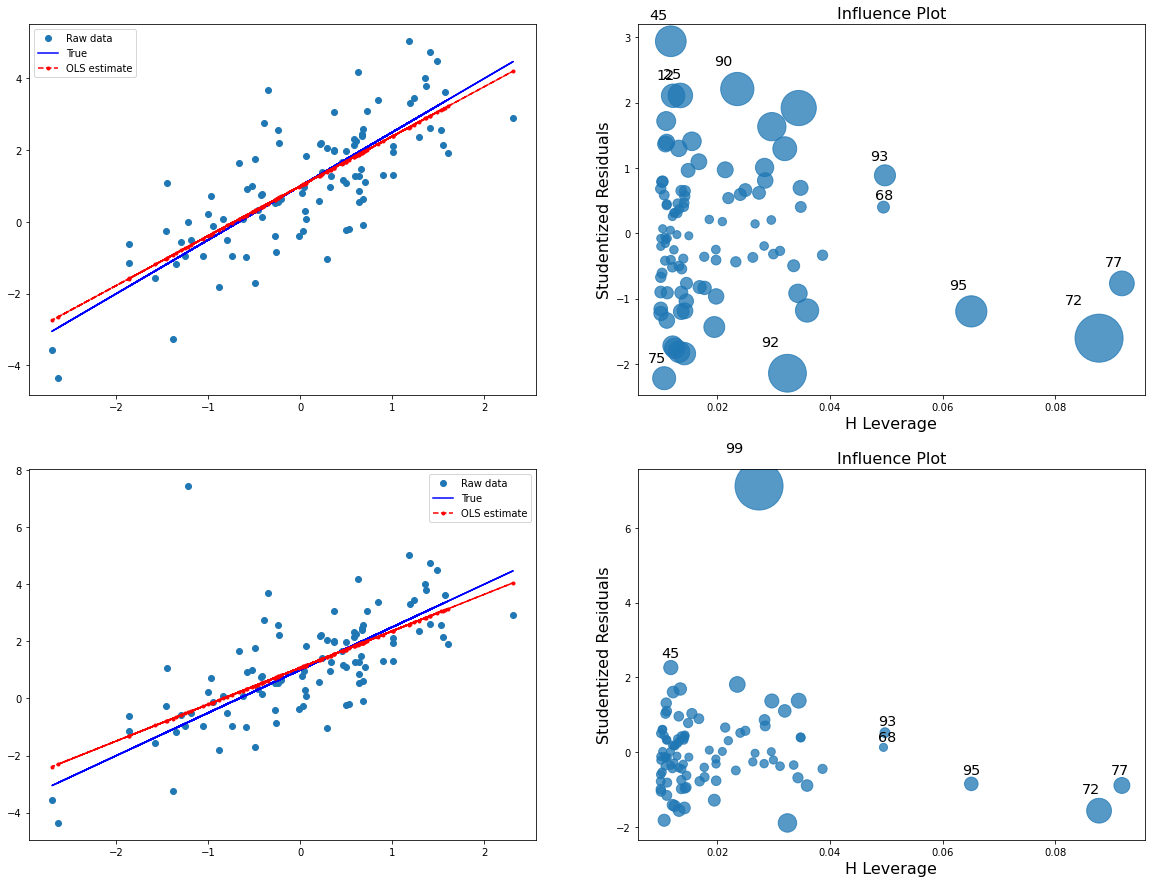

In [41]:
fig, ax1 = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

ax1[0,0].plot(x, y, 'o', label="Raw data")
ax1[0,0].plot(x, y_true, 'b-', label="True")
ax1[0,0].plot(x, reg.fittedvalues, 'r--.', label="OLS estimate")
ax1[0,0].legend(loc='best')
sm.graphics.influence_plot(reg,ax=ax1[0,1])


ax1[1,0].plot(x, y_outlier, 'o', label="Raw data")
ax1[1,0].plot(x, y_true, 'b-', label="True")
ax1[1,0].plot(x, reg_outlier.fittedvalues, 'r--.', label="OLS estimate")
ax1[1,0].legend(loc='best')
sm.graphics.influence_plot(reg_outlier,ax=ax1[1,1])

plt.show()


In [42]:
from statsmodels.graphics.plot_grids import scatter_ellipse
data = sm.datasets.statecrime.load_pandas().data
data

,violent,murder,hs_grad,poverty,single,white,urban
state,,,,,,,
Alabama,459.9,7.1,82.1,17.5,29.0,70.0,48.65
Alaska,632.6,3.2,91.4,9.0,25.5,68.3,44.46
Arizona,423.2,5.5,84.2,16.5,25.7,80.0,80.07
Arkansas,530.3,6.3,82.4,18.8,26.3,78.4,39.54
California,473.4,5.4,80.6,14.2,27.8,62.7,89.73
Colorado,340.9,3.2,89.3,12.9,21.4,84.6,76.86
Connecticut,300.5,3.0,88.6,9.4,25.0,79.1,84.83
Delaware,645.1,4.6,87.4,10.8,27.6,71.9,68.71
District of Columbia,1348.9,24.2,87.1,18.4,48.0,38.7,100.00


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\plot_grids.py:116: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(nvars-1, nvars-1, (i-1)*(nvars-1)+j+1)


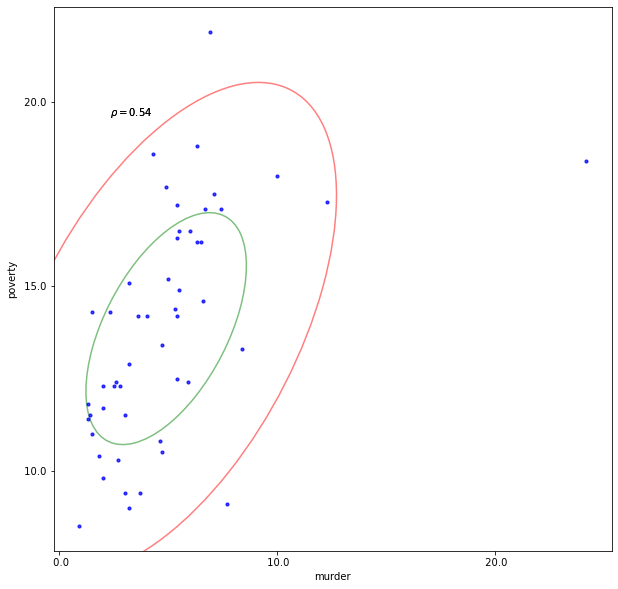

In [50]:
subset=data[['murder','poverty']]

fig = plt.figure(figsize=(10,10))
scatter_ellipse(subset, varnames=subset.columns, fig=fig, level=0.9, 
                plot_kwds={'color':'blue'},
                ell_kwds={'color':'red'})
scatter_ellipse(subset, varnames=subset.columns, fig=fig, level=0.4, 
                plot_kwds={'color':'blue'},
                ell_kwds={'color':'green'})
plt.show()

### OLS with dummy variables

We generate some artificial data. There are 3 groups which will be modelled using dummy variables. Group 0 is the omitted/benchmark category.

In [51]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
#dummy = (groups[:,None] == np.unique(groups)).astype(float)

dummy = sm.categorical(groups, drop=True)
x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:,1:]))
X = sm.add_constant(X, prepend=False)

beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\tools.py:162: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  FutureWarning


In [52]:
X

array([[ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.40816327,  0.        ,  0.        ,  1.        ],
       [ 0.81632653,  0.        ,  0.        ,  1.        ],
       [ 1.2244898 ,  0.        ,  0.        ,  1.        ],
       [ 1.63265306,  0.        ,  0.        ,  1.        ],
       [ 2.04081633,  0.        ,  0.        ,  1.        ],
       [ 2.44897959,  0.        ,  0.        ,  1.        ],
       [ 2.85714286,  0.        ,  0.        ,  1.        ],
       [ 3.26530612,  0.        ,  0.        ,  1.        ],
       [ 3.67346939,  0.        ,  0.        ,  1.        ],
       [ 4.08163265,  0.        ,  0.        ,  1.        ],
       [ 4.48979592,  0.        ,  0.        ,  1.        ],
       [ 4.89795918,  0.        ,  0.        ,  1.        ],
       [ 5.30612245,  0.        ,  0.        ,  1.        ],
       [ 5.71428571,  0.        ,  0.        ,  1.        ],
       [ 6.12244898,  0.        ,  0.        ,  1.        ],
       [ 6.53061224,  0.

In [53]:
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     546.7
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           5.74e-36
Time:                        21:17:10   Log-Likelihood:                -69.398
No. Observations:                  50   AIC:                             146.8
Df Residuals:                      46   BIC:                             154.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0443      0.066     15.849      0.000       0.912       1.177
x2             2.1306      0.626      3.405      0.001       0.871       3.390
x3            -3.6366      1.019     -3.567      0.001      -5.689      -1.585
const         10.0651      0.341     29.506      0.000       9.378      10.752
==============================================================================
Omnibus:                        0.127   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.173
Skew:                          -0.108   Prob(JB):                        0.917
Kurtosis:                       2.809   Cond. No.                         96.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

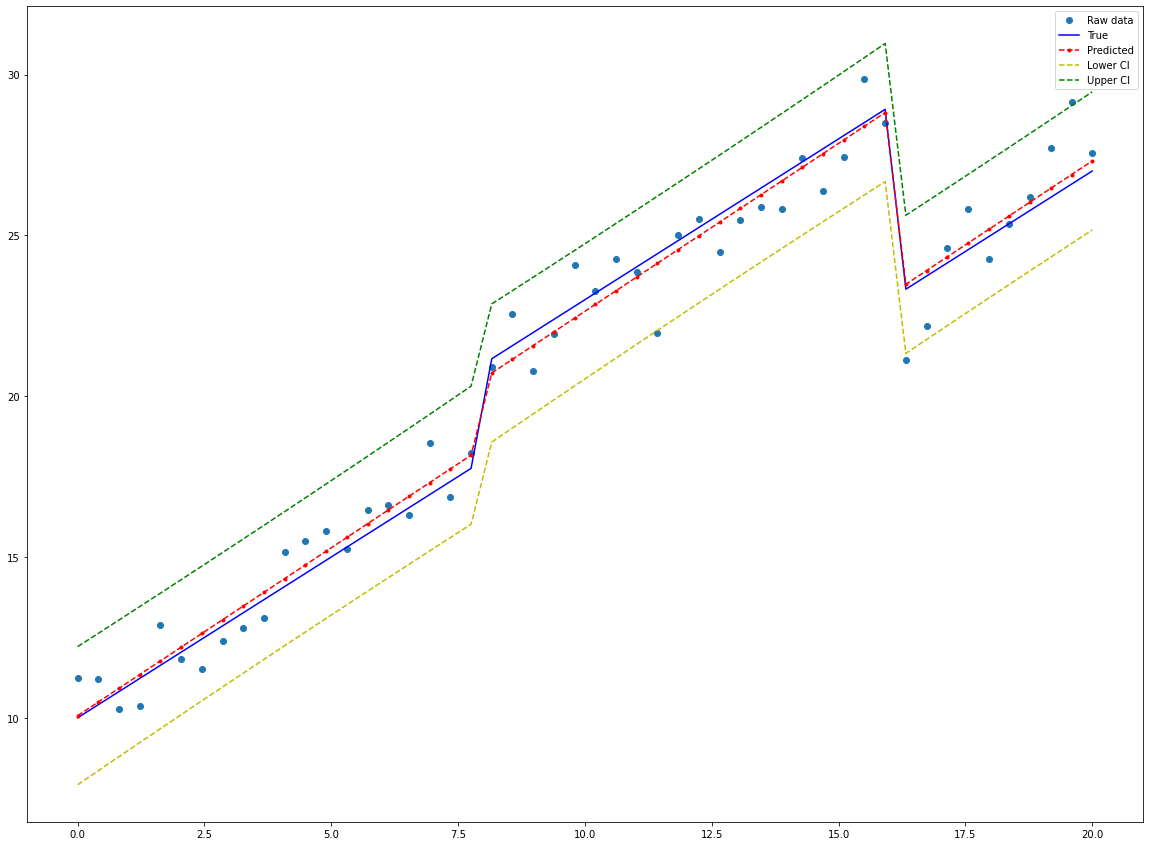

In [54]:
prstd, CI_L, CI_U = wls_prediction_std(reg, alpha=0.05)

fig, ax = plt.subplots(figsize=(20,15))

ax.plot(x, y, 'o', label="Raw data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, reg.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, CI_L, 'y--', label="Lower CI")
ax.plot(x, CI_U, 'g--', label="Upper CI")
legend = ax.legend(loc="best")


### Joint hypothesis test

### F-test

To test the hypothesis that both coefficients are equal to zero, that is, $R \times \beta =0$, apply an F-test to see if you can reject the null hypothesis:


In [55]:
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(np.array(R))
reg.f_test(R)

[[0 1 0 0]
 [0 0 1 0]]


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[96.3465977]]), p=3.573627199955754e-17, df_denom=46, df_num=2>

You can also use formula-like syntax to test hypotheses

In [56]:
reg.f_test("x2 = x3 = 0")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[96.3465977]]), p=3.5736271999559315e-17, df_denom=46, df_num=2>

### (Multi)collinearity

Multiple regression is wonderful – It allows you to consider the effect of multiple variables simultaneously. On the flip side, multiple regression is extremely unpleasant - Because it allows you to consider the effect of multiple variables simultaneously.  

(Multi)collinearity (or inter correlation) exists when at least some of the predictor variables are correlated among themselves.     The parameter estimates will have inflated variance in presence of multicollineraity. Sometimes the signs of the parameter estimates tend to change. If the relation between the independent variables grows really strong then the variance of parameter estimates tends to be infinity.  

For additional information see __[Eight Ways to Detect Multicollinearity](https://www.theanalysisfactor.com/eight-ways-to-detect-multicollinearity/)__.

The **Longley** dataset is well known to have high multicollinearity. That is, the exogenous predictors are highly correlated. This is problematic because it can affect the stability of our coefficient estimates as we make minor changes to model specification.

In [4]:
from statsmodels.datasets.longley import load_pandas
y = load_pandas().endog
X = load_pandas().exog
X = sm.add_constant(X)

In [58]:
ols_results = sm.OLS(y, X).fit()
ols_results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           4.98e-10
Time:                        21:19:43   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.004    -5.5e+06   -1.47e+06
GNPDEFL       15.0619     84.915      0.177      0.863    -177.029     207.153
GNP           -0.0358      0.033     -1.070      0.313      -0.112       0.040
UNEMP         -2.0202      0.488     -4.136      0.003      -3.125      -0.915
ARMED         -1.0332      0.214     -4.822      0.001      -1.518      -0.549
POP           -0.0511      0.226     -0.226      0.826      -0.563       0.460
YEAR        1829.1515    455.478      4.016      0.003     798.788    2859.515
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   2.559
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.684
Skew:                           0.420   Prob(JB):                        0.710
Kurtosis:                       2.434   Cond. No.                     4.86e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Condition number

One way to assess multicollinearity is to compute the condition number. Values over 20 are worrisome. The first step is to normalize the independent variables to have unit length:

In [59]:
np.linalg.cond(reg.model.exog)

96.34204153176864

The next 4 cells of code are optional but provide more advanced insight into collinearity problem:

In [60]:
norm_x = X.values
for i, name in enumerate(X):
    if name == "const":
        continue
    norm_x[:,i] = X[name]/np.linalg.norm(X[name])
norm_xtx = np.dot(norm_x.T,norm_x)

Then, we take the square root of the ratio of the biggest to the smallest eigen values.

In [61]:
eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

56240.86912789531


We can also look at formal statistics for this such as the DFBETAS – a standardized measure of how much each coefficient changes when that observation is left out.

In general we may consider DBETAS in absolute value greater than $\frac{2}{\sqrt{N}}$ to be influential observations

In [62]:
2./len(X)**.5

0.5

In [63]:
infl = ols_results.get_influence()
print(infl.summary_frame().filter(regex="dfb"))
print(infl.summary_frame().filter(regex="cooks_d"))

    dfb_const  dfb_GNPDEFL       dfb_GNP     dfb_UNEMP     dfb_ARMED  \
0   -0.016406  -169.822675  1.673981e+06  54490.318088  51447.824036   
1   -0.020608  -187.251727  1.829990e+06  54495.312977  52659.808664   
2   -0.008382   -65.417834  1.587601e+06  52002.330476  49078.352378   
3    0.018093   288.503914  1.155359e+06  56211.331922  60350.723082   
4    1.871260  -171.109595  4.498197e+06  82532.785818  71034.429294   
5   -0.321373  -104.123822  1.398891e+06  52559.760056  47486.527649   
6    0.315945  -169.413317  2.364827e+06  59754.651394  50371.817827   
7    0.015816   -69.343793  1.641243e+06  51849.056936  48628.749338   
8   -0.004019   -86.903523  1.649443e+06  52023.265116  49114.178265   
9   -1.018242  -201.315802  1.371257e+06  56432.027292  53997.742487   
10   0.030947   -78.359439  1.658753e+06  52254.848135  49341.055289   
11   0.005987  -100.926843  1.662425e+06  51744.606934  48968.560299   
12  -0.135883   -32.093127  1.245487e+06  50203.467593  51148.37

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:733: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_internal * np.sqrt(hii / (1 - hii))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:762: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_external * np.sqrt(hii / (1 - hii))


#### Variance Inflation Factor (VIF)

Suppose you want to estimate $Y=\beta_0+\beta_1X_1+\beta_2X_2+\beta_3X_3+\beta_4X_4+\epsilon$

1. Build a model $X_1$ vs $X_2$, $X_3$, $X_4$ and find $R^2$, say $R_1$
2. Build a model $X_2$ vs $X_1$, $X_3$, $X_4$ and find $R^2$, say $R_2$
3. Build a model $X_3$ vs $X_1$, $X_2$, $X_4$ and find $R^2$, say $R_3$
4. Build a model $X_4$ vs $X_1$, $X_2$, $X_3$ and find $R^2$, say $R_4$

For example if $R_3$ is 95% then we don’t really need $X_3$ in the model, since it can be explained as liner combination of other three based on our estimated $R_3$.  

Thus, for each variable we find individual $R^2$, and calculate $VIF=\frac{1}{(1−R^2)}$.

> <font color=red>**Homework:**</font> Write a function that takes in X's and checks for pottential collinearity problem using VIF. Your input is array/matrix with X variables in columns or panda's DataFrame. Your output is the __sorted__ (from highest to lowest) list of (column name)/(VIF number) pairs.  


In [5]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import load_boston
import statsmodels.api as sm

In [114]:
boston_dataset=load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [115]:
# Break into left and right hand side; y and X
y, X = dmatrices("MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS +RAD + TAX + PTRATIO + B + LSTAT", data=boston, return_type="dataframe")

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(1,X.shape[1])]

# Fit X to y
result = sm.OLS(y, X).fit()
np.linalg.cond(result.model.exog)

15113.51759913488

In [105]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 23 Feb 2021   Prob (F-statistic):          6.72e-135
Time:                        21:34:31   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
X

,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [69]:
vif

[1.7921915474332406,
 2.298758178749441,
 3.9915964183460315,
 1.0739953275537883,
 4.393719847577493,
 1.9337444357832565,
 3.1008255128153372,
 3.9559449063727263,
 7.484496335274472,
 9.00855394759707,
 1.7990840492488989,
 1.3485210764063753,
 2.9414910780919366]

In [98]:
# Break into left and right hand side; y and X
y, X = dmatrices("MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + DIS +RAD + PTRATIO + LSTAT", data=boston, return_type="dataframe")
# + AGE + TAX + B 

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(1,X.shape[1])]

# Fit X to y
result = sm.OLS(y, X).fit()
np.linalg.cond(result.model.exog)

819.5828693108053

In [99]:
vif

[1.767314809681978,
 2.154344382213968,
 3.2174312278042656,
 1.0522622007337827,
 4.0389882469341,
 1.8264031055829306,
 3.613174628583744,
 2.746835721075821,
 1.774762691807408,
 2.5467301795949644]

In [110]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 23 Feb 2021   Prob (F-statistic):          6.72e-135
Time:                        21:37:40   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Heteroskedasticity tests

#### Breush-Pagan test:

In [106]:
from statsmodels.compat import lzip
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(result.resid, result.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 65.12178613716242),
 ('p-value', 6.265430719874847e-09),
 ('f-value', 5.590226641705066),
 ('f p-value', 1.4957755130728718e-09)]

#### Goldfeld-Quandt test:

In [107]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(result.resid, result.model.exog)
lzip(name, test)

[('F statistic', 2.4311473253497446), ('p-value', 7.302071915608971e-12)]

### Linearity test

Harvey-Collier multiplier test for Null hypothesis that the linear specification is correct:

In [135]:
y, X = dmatrices("MEDV ~ CRIM + ZN + INDUS ", data=boston, return_type="dataframe")
result = sm.OLS(y, X).fit()

name = ['t value', 'p value']
test = sms.linear_harvey_collier(result)
lzip(name, test)

[('t value', 1.2232664596867737), ('p value', 0.22180297678733396)]

## Further readings
- https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html
- https://www.statsmodels.org/stable/diagnostic.html
- https://www.statsmodels.org/stable/graphics.html
- https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/
- An interesting new library for regression visualization (designed to work togethr with `sklearn`) https://www.scikit-yb.org/en/latest/api/regressor/index.html

